In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/clicks-conversion-tracking/KAG_conversion_data.csv


In [17]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [18]:
df=pd.read_csv("../input/clicks-conversion-tracking/KAG_conversion_data.csv")
df.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1


In [6]:
df.shape

(1143, 11)

In [7]:
# Check For Dtypes
df.dtypes

ad_id                    int64
xyz_campaign_id          int64
fb_campaign_id           int64
age                     object
gender                  object
interest                 int64
Impressions              int64
Clicks                   int64
Spent                  float64
Total_Conversion         int64
Approved_Conversion      int64
dtype: object

In [8]:
# Check For Missing NAN
df.isnull().sum()

ad_id                  0
xyz_campaign_id        0
fb_campaign_id         0
age                    0
gender                 0
interest               0
Impressions            0
Clicks                 0
Spent                  0
Total_Conversion       0
Approved_Conversion    0
dtype: int64

Dummy encode any categorical or object values in the data and save the resulting data frame to variable X. So our categorical is age and object is gender.

In [9]:
#dummies
X=pd.get_dummies(df,columns=['gender','age'])
X.head()


,ad_id,xyz_campaign_id,fb_campaign_id,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,gender_F,gender_M,age_30-34,age_35-39,age_40-44,age_45-49
0,708746,916,103916,15,7350,1,1.43,2,1,0,1,1,0,0,0
1,708749,916,103917,16,17861,2,1.82,2,0,0,1,1,0,0,0
2,708771,916,103920,20,693,0,0.00,1,0,0,1,1,0,0,0
3,708815,916,103928,28,4259,1,1.25,1,0,0,1,1,0,0,0
4,708818,916,103928,28,4133,1,1.29,1,1,0,1,1,0,0,0


In [10]:
X

,ad_id,xyz_campaign_id,fb_campaign_id,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,gender_F,gender_M,age_30-34,age_35-39,age_40-44,age_45-49
0,708746,916,103916,15,7350,1,1.430000,2,1,0,1,1,0,0,0
1,708749,916,103917,16,17861,2,1.820000,2,0,0,1,1,0,0,0
2,708771,916,103920,20,693,0,0.000000,1,0,0,1,1,0,0,0
3,708815,916,103928,28,4259,1,1.250000,1,0,0,1,1,0,0,0
4,708818,916,103928,28,4133,1,1.290000,1,1,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,1314410,1178,179977,109,1129773,252,358.189997,13,2,1,0,0,0,0,1
1139,1314411,1178,179978,110,637549,120,173.880003,3,0,1,0,0,0,0,1
1140,1314412,1178,179979,111,151531,28,40.289999,2,0,1,0,0,0,0,1
1141,1314414,1178,179981,113,790253,135,198.710001,8,2,1,0,0,0,0,1


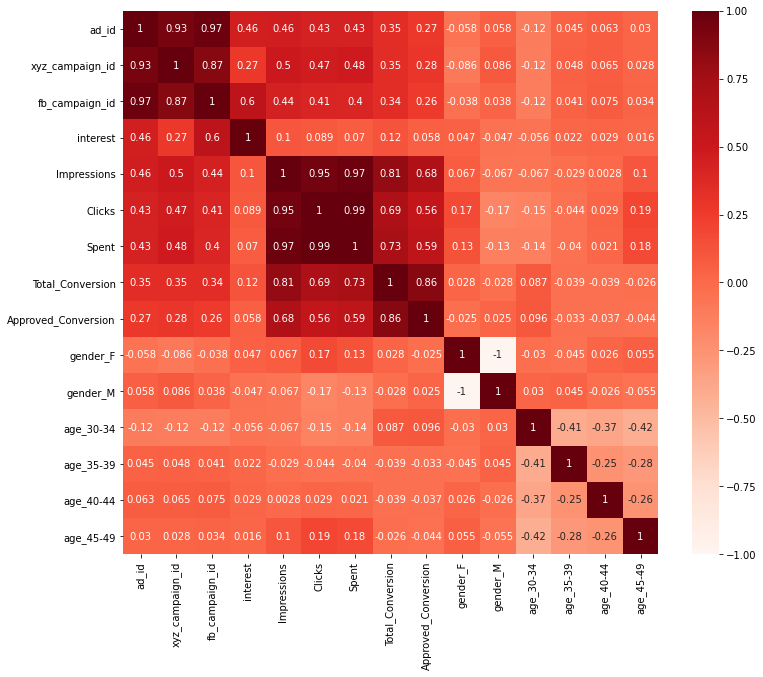

In [11]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = X.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

Drop the first 4 columns in the data frame X.

In [12]:
# Remove all columns between column index 0 to 3
X.drop(X.iloc[:, 0:3], inplace = True, axis = 1)

In [16]:
X

,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,gender_F,gender_M,age_30-34,age_35-39,age_40-44,age_45-49
0,15,7350,1,1.430000,2,1,0,1,1,0,0,0
1,16,17861,2,1.820000,2,0,0,1,1,0,0,0
2,20,693,0,0.000000,1,0,0,1,1,0,0,0
3,28,4259,1,1.250000,1,0,0,1,1,0,0,0
4,28,4133,1,1.290000,1,1,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1138,109,1129773,252,358.189997,13,2,1,0,0,0,0,1
1139,110,637549,120,173.880003,3,0,1,0,0,0,0,1
1140,111,151531,28,40.289999,2,0,1,0,0,0,0,1
1141,113,790253,135,198.710001,8,2,1,0,0,0,0,1


WE DROP THEM BECAUSE THEY ARE LESS CORRELATED WITH AGE GROUP.

# Elbow method:

The best number of clusters for the data in the range of 2 to 20

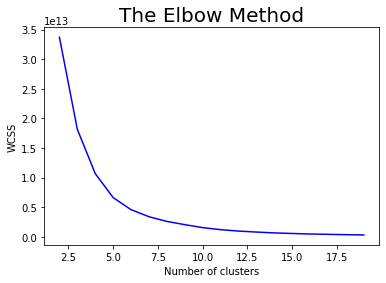

In [21]:
from sklearn.cluster import KMeans
import seaborn as sns
wcss = []
for i in range(2, 20):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(2, 20), wcss, c = 'blue')
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Using the value at your elbow point to cluster the values

In [22]:
kmeans = KMeans(n_clusters = 6, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)


In [29]:
y_kmeans

(1143,)

In [26]:
#Adding y_kmeans in df
df['Advert_Type'] = y_kmeans
df.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,Advert_Type
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1,0
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1,0


In [30]:
df.Advert_Type.count

<bound method Series.count of 0       0
1       0
2       0
3       0
4       0
       ..
1138    5
1139    1
1140    4
1141    1
1142    2
Name: Advert_Type, Length: 1143, dtype: int32>

In [31]:
print(df['Advert_Type'].unique())

[0 4 2 5 1 3]


In [32]:
#checking unique code on xyz campaign
print(df['xyz_campaign_id'].unique())

[ 916  936 1178]


In [39]:
#checking unique code on fb campaign
print(df['fb_campaign_id'].unique())

[103916 103917 103920 103928 103929 103940 103941 103951 103952 103955
 103962 103965 103968 103976 103978 103979 103988 103989 104012 104013
 104034 104049 104061 104085 104108 104109 104133 104140 104185 104205
 104220 104228 104229 104230 104239 104252 104265 104270 104272 104285
 104287 104328 104396 104419 104423 104438 104467 108654 108655 108660
 108664 108665 108668 108672 108678 108680 108683 108686 108689 108690
 108691 108692 108716 108720 108729 108730 108740 108742 108750 108752
 108753 108761 108762 108764 108766 108770 108774 108776 108781 108786
 108788 108791 108792 108793 108794 108797 108804 108809 108810 108811
 108817 108818 108822 108823 108826 108827 108834 108836 109448 109451
 109452 109470 109472 109473 109498 109507 109553 109565 109601 109629
 109633 109637 109659 109689 109698 109706 109714 109717 109731 109738
 109788 109808 109813 109816 109820 109826 109839 109844 109848 109850
 109851 109852 109857 109859 110836 110837 110838 110842 110856 110861
 11086

fb_campaign_id are just unique id so we ommit it and focus on xyz campaign alone

# Which advert type lead to the highest and consistent amount of sales by customers of all the age brackets?

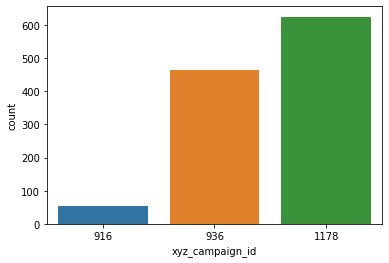

In [37]:
#checking count on xyz_campaign_id
sns.countplot(x="xyz_campaign_id",data = df)
plt.show()

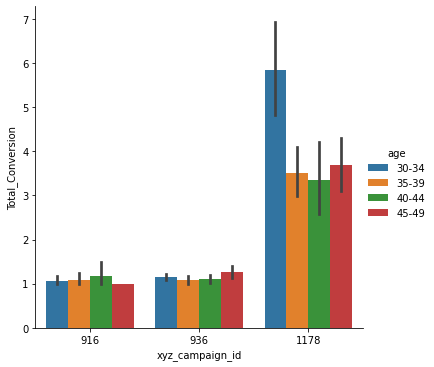

In [38]:
sns.catplot(x="xyz_campaign_id", y="Total_Conversion",hue="age",kind="bar",data=df)

# Does the company xyz have gender bias in terms of their ad spending? Are their products gender neutral?

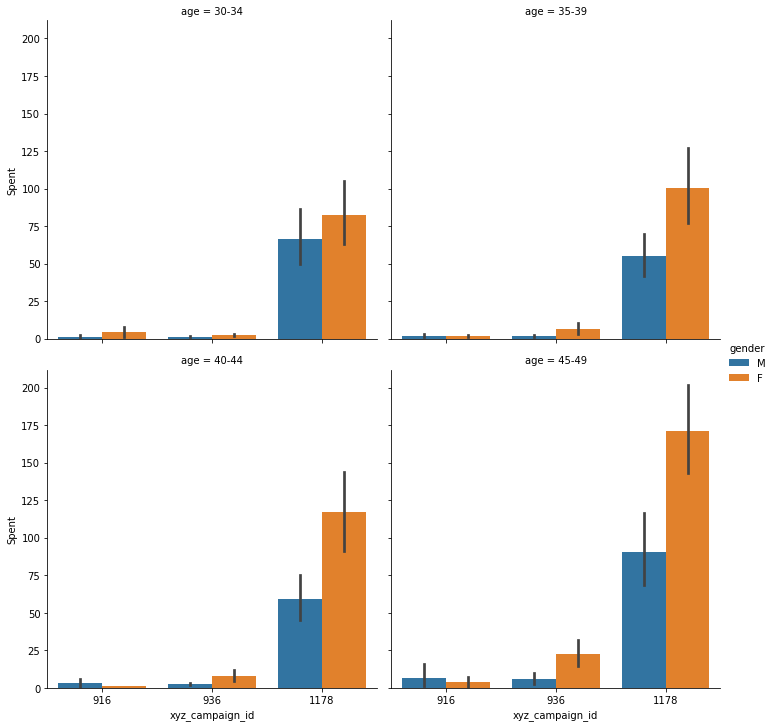

In [41]:
sns.catplot(x="xyz_campaign_id", y="Spent",hue="gender", col="age",kind="bar",data=df,col_wrap=2)

# Hierarchical clustering

In [46]:
data = df.iloc[:, [1]].values


In [47]:
data

array([[ 916],
       [ 916],
       [ 916],
       ...,
       [1178],
       [1178],
       [1178]])

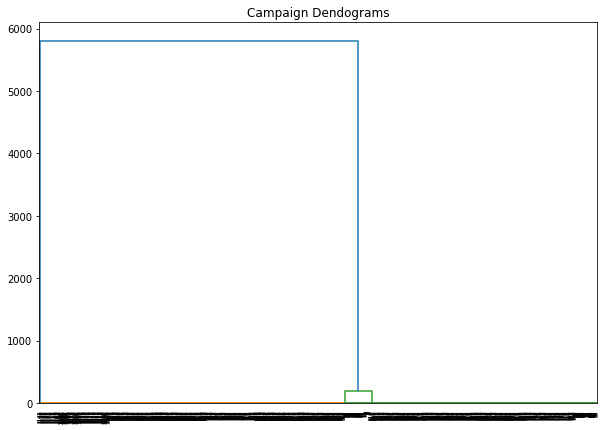

In [53]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))
plt.title("Campaign Dendograms")
dend = shc.dendrogram(shc.linkage(data, method='ward'))

In [56]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='ward')
cluster.fit_predict(data)

array([2, 2, 2, ..., 5, 4, 3])

In [60]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
cluster.fit_predict(data)

array([2, 2, 2, ..., 0, 4, 3])

In [ ]:
plt.figure(figsize=(10, 7))
plt.scatter(data[:,0], data[:,1], c=cluster.labels_, cmap='rainbow')